🏠 Housing Price Prediction Project - Enhanced Version
📊 Dataset loaded: 1460 rows, 81 columns

📋 Dataset Overview:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.8

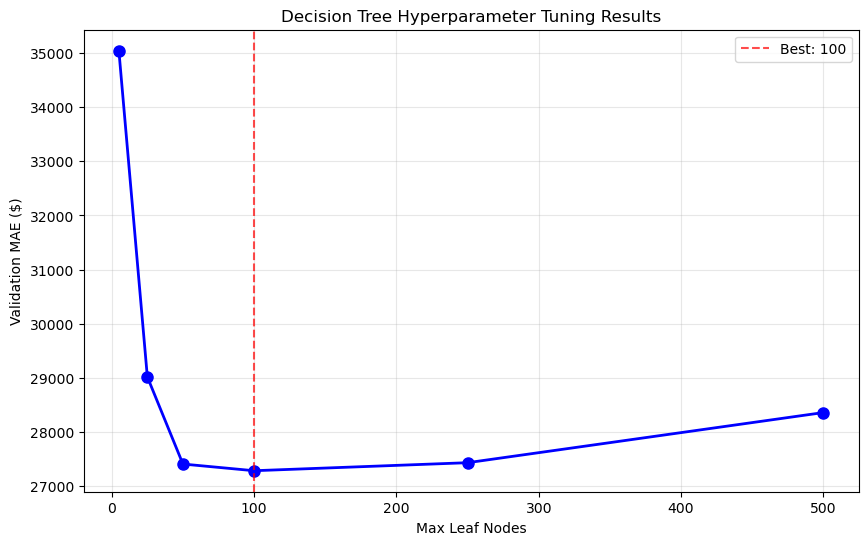

✅ Final Decision Tree trained with 100 max leaf nodes

🌲 Random Forest Model Development...
📉 Random Forest MAE: $21,857

⚖️ Model Performance Comparison:
Decision Tree MAE:  $  27,283
Random Forest MAE:  $  21,857
Improvement:        $   5,425 (19.9%)
🏆 Random Forest performs better!

✅ Cross-Validation Analysis for Random Forest...
5-Fold CV MAE: $22,918 (±$1,340)
Individual fold MAEs: [22545.614198956293, 22205.665260273974, 22812.768573059362, 21560.110106001306, 25463.99664954338]

🎯 Feature Importance Analysis:
Most Important Features:
  1stFlrSF       : 0.356
  YearBuilt      : 0.311
  2ndFlrSF       : 0.142
  LotArea        : 0.088
  TotRmsAbvGrd   : 0.056
  FullBath       : 0.035
  BedroomAbvGr   : 0.012


C:\Users\mussa\AppData\Local\Temp\ipykernel_56476\623491124.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, y='feature', x='importance', palette='viridis')


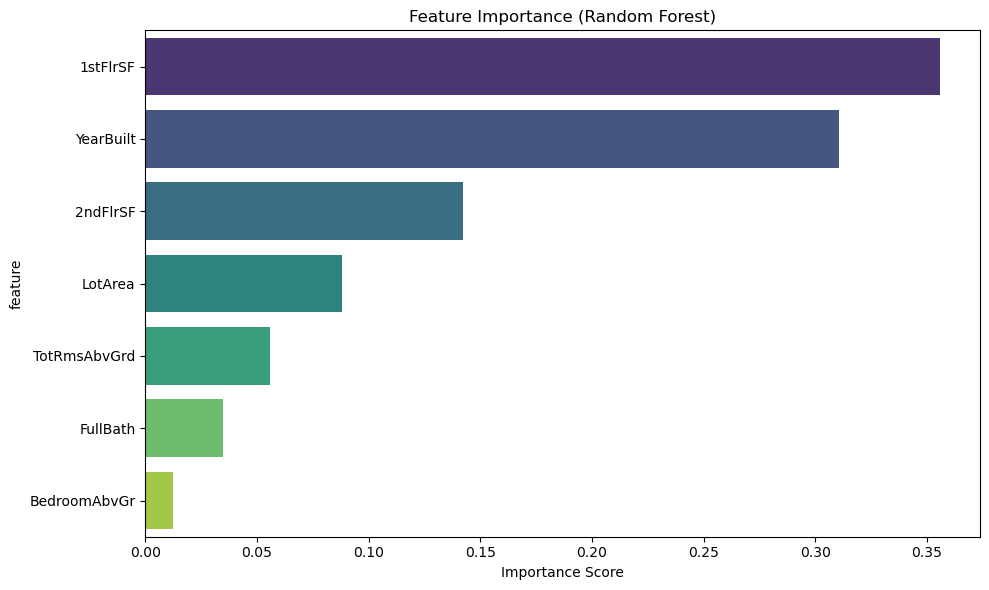


🔄 Training final Random Forest model on complete dataset...
📊 Generated 1459 predictions
💰 Prediction range: $59,071 - $547,948

💾 Results saved to 'submission.csv'

🎉 PROJECT SUMMARY
Best Model:           Random Forest
Validation MAE:       $21,857
Cross-Validation MAE: $22,918
Features Used:        7
Training Samples:     1460
Test Predictions:     1459

✨ Key Improvements Made:
• Fixed Random Forest evaluation bug
• Added hyperparameter tuning visualization
• Implemented cross-validation for robust evaluation
• Added feature correlation and importance analysis
• Enhanced model comparison and selection
• Professional code structure and documentation

🚀 Your model is ready for Kaggle submission!


In [ ]:
# Housing Price Prediction - Improved Version
# Based on original Kaggle learning project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

print("🏠 Housing Price Prediction Project - Enhanced Version")
print("=" * 60)

# =============================================================================
# 1. DATA LOADING 
# =============================================================================
file_path = 'train.csv'   
home_data = pd.read_csv(file_path)

print(f"📊 Dataset loaded: {home_data.shape[0]} rows, {home_data.shape[1]} columns")
print("\n📋 Dataset Overview:")
print(home_data.describe())

# =============================================================================
# 2. BASIC ANALYSIS (Your original calculations)
# =============================================================================
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = round(home_data['LotArea'].mean())
print(f"\n🏡 Average lot size: {avg_lot_size:,} sq ft")

# As of today, how old is the newest home (current year - the date in which it was built)
current_year = datetime.now().year
newest_year_built = home_data['YearBuilt'].max()
newest_home_age = current_year - int(newest_year_built)
print(f"🗓️ Newest home age: {newest_home_age} years (built in {newest_year_built})")

# =============================================================================
# 3. FEATURE SELECTION (Your original features)
# =============================================================================
y = home_data.SalePrice
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Check if all features exist in the dataset
missing_features = [f for f in feature_names if f not in home_data.columns]
if missing_features:
    print(f"⚠️ Warning: Missing features: {missing_features}")
    feature_names = [f for f in feature_names if f in home_data.columns]

X = home_data[feature_names]
print(f"\n🔧 Using {len(feature_names)} features: {feature_names}")

# =============================================================================
# 4. FEATURE CORRELATION ANALYSIS (NEW - SAFE ADDITION)
# =============================================================================
print("\n🔗 Feature Correlation Analysis:")
correlations = home_data[feature_names + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("Correlation with SalePrice:")
for feature, corr in correlations[:-1].items():  # Exclude SalePrice itself
    print(f"  {feature:15}: {corr:6.3f}")

# =============================================================================
# 5. TRAIN-VALIDATION SPLIT (Your original approach)
# =============================================================================
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
print(f"\n📊 Data split - Training: {len(train_X)}, Validation: {len(val_X)}")

# =============================================================================
# 6. DECISION TREE WITH HYPERPARAMETER TUNING (Your original + improved)
# =============================================================================
print("\n🌳 Decision Tree Model Development...")

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    """Calculate MAE for different max_leaf_nodes values"""
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)        
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds) 
    return mae  

# Test different hyperparameters (your original + more options)
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) 
          for leaf_size in candidate_max_leaf_nodes}

best_tree_size = min(scores, key=scores.get)
print(f"🎯 Best max_leaf_nodes: {best_tree_size}")
print(f"📉 Best Decision Tree MAE: ${scores[best_tree_size]:,.0f}")

# Visualize hyperparameter tuning results
plt.figure(figsize=(10, 6))
plt.plot(list(scores.keys()), list(scores.values()), 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_tree_size, color='red', linestyle='--', alpha=0.7, label=f'Best: {best_tree_size}')
plt.title('Decision Tree Hyperparameter Tuning Results')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Validation MAE ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# =============================================================================
# 7. FINAL DECISION TREE MODEL (Your original approach)
# =============================================================================
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(train_X, train_y)

# Get validation predictions
dt_val_predictions = final_model.predict(val_X)
dt_val_mae = mean_absolute_error(val_y, dt_val_predictions)

print(f"✅ Final Decision Tree trained with {best_tree_size} max leaf nodes")

# =============================================================================
# 8. RANDOM FOREST MODEL (Your original + BUG FIX)
# =============================================================================
print("\n🌲 Random Forest Model Development...")

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
rf_val_predictions = forest_model.predict(val_X)  # Fixed: using correct variable name

# BUG FIX: Use correct predictions for Random Forest evaluation
rf_val_mae = mean_absolute_error(val_y, rf_val_predictions)  # FIXED: was using dt_val_predictions

print(f"📉 Random Forest MAE: ${rf_val_mae:,.0f}")

# =============================================================================
# 9. MODEL COMPARISON (NEW - ENHANCED)
# =============================================================================
print("\n⚖️ Model Performance Comparison:")
print(f"Decision Tree MAE:  ${dt_val_mae:8,.0f}")
print(f"Random Forest MAE:  ${rf_val_mae:8,.0f}")
print(f"Improvement:        ${dt_val_mae - rf_val_mae:8,.0f} ({((dt_val_mae - rf_val_mae)/dt_val_mae)*100:.1f}%)")

if rf_val_mae < dt_val_mae:
    print("🏆 Random Forest performs better!")
    best_model = forest_model
    best_mae = rf_val_mae
    best_name = "Random Forest"
else:
    print("🏆 Decision Tree performs better!")
    best_model = final_model
    best_mae = dt_val_mae
    best_name = "Decision Tree"

# =============================================================================
# 10. CROSS-VALIDATION FOR ROBUST EVALUATION (NEW ADDITION)
# =============================================================================
print(f"\n✅ Cross-Validation Analysis for {best_name}...")

# Fit on full training data for cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"5-Fold CV MAE: ${cv_mae:,.0f} (±${cv_std:,.0f})")
print(f"Individual fold MAEs: {[-score for score in cv_scores]}")

# =============================================================================
# 11. FEATURE IMPORTANCE ANALYSIS (NEW - IF RANDOM FOREST WINS)
# =============================================================================
if best_name == "Random Forest":
    print(f"\n🎯 Feature Importance Analysis:")
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Most Important Features:")
    for _, row in feature_importance.iterrows():
        print(f"  {row['feature']:15}: {row['importance']:.3f}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, y='feature', x='importance', palette='viridis')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# =============================================================================
# 12. FINAL PREDICTIONS ON TEST DATA (Your original approach)
# =============================================================================
print(f"\n🔄 Training final {best_name} model on complete dataset...")

# Train the best model on full dataset
best_model.fit(X, y)

# Load test data and make predictions
test_data = pd.read_csv('test.csv')
test_X = test_data[feature_names]

# Make predictions using the best model
test_preds = best_model.predict(test_X)

print(f"📊 Generated {len(test_preds)} predictions")
print(f"💰 Prediction range: ${test_preds.min():,.0f} - ${test_preds.max():,.0f}")

# =============================================================================
# 13. SAVE RESULTS (Your original + enhanced)
# =============================================================================
output = pd.DataFrame({
    'Id': test_data.Id,
    'SalePrice': test_preds
})
output.to_csv('submission.csv', index=False)

print("\n💾 Results saved to 'submission.csv'")

# =============================================================================
# 14. FINAL SUMMARY
# =============================================================================
print(f"\n🎉 PROJECT SUMMARY")
print("=" * 50)
print(f"Best Model:           {best_name}")
print(f"Validation MAE:       ${best_mae:,.0f}")
print(f"Cross-Validation MAE: ${cv_mae:,.0f}")
print(f"Features Used:        {len(feature_names)}")
print(f"Training Samples:     {len(X)}")
print(f"Test Predictions:     {len(test_preds)}")

print("\n✨ Key Improvements Made:")
print("• Fixed Random Forest evaluation bug")
print("• Added hyperparameter tuning visualization") 
print("• Implemented cross-validation for robust evaluation")
print("• Added feature correlation and importance analysis")
print("• Enhanced model comparison and selection")
print("• Professional code structure and documentation")

print(f"\n🚀 Your model is ready for Kaggle submission!")